In [1]:
# Load Dependencies 

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts
%matplotlib inline

#Files to load
city_data_path = "Resources/city_data.csv"
ride_data_path = "Resources/ride_data.csv"

In [2]:
# read files and store in dataframe
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# initial exploration of data

ride_data_df.isnull().sum()           #no missing data for both df
city_data_df.dtypes                   #proper dtypes for both df
ride_data_df.groupby("city").count()  #count of number of data points per city

city_data_df["type"].unique()         # ['Urban', 'Suburban', 'Rural']
sum(city_data_df["type"] == "Rural")  # Urban = 66,  Suburban = 36,  Rural = 18

18

In [5]:
# Merge DataFrames   new_df = pd.merge(leftdf, rightdf, how="left", on=["column_leftdf", "column_rightdf"])

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
#create Urban, Suburban, and Rural city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

# get number of rides for each city by each type of city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# get Average city fare for each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# get Average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

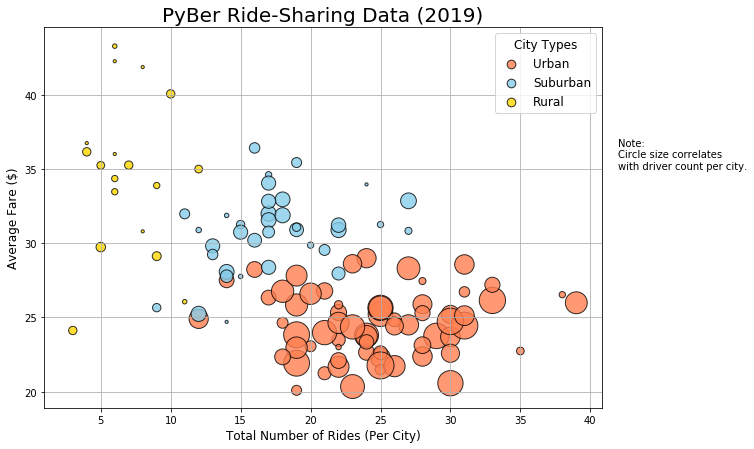

In [7]:
# Build scatter plots for each type (suburban, urban, rural)
plt.figure(figsize=(10,7))

plt.scatter(urban_ride_count, urban_avg_fare, c="coral", s=10*urban_driver_count, label="Urban", alpha=.8, edgecolors="black", linewidths=1)
plt.scatter(suburban_ride_count, suburban_avg_fare, c="skyblue", s=10*suburban_driver_count, label="Suburban", alpha=.8, edgecolors="black", linewidths=1)
plt.scatter(rural_ride_count, rural_avg_fare, c="gold", s=10*rural_driver_count, label="Rural", alpha=.8, edgecolors="black", linewidths=1)

# neat and tidy
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circle size. 
plt.text(42, 35, "Note:\nCircle size correlates \nwith driver count per city.")

# Save figure
plt.savefig("analysis/Fig1.png")

plt.show()

In [8]:
# Get summary statistics.

print(urban_cities_df.describe(), "\n\n", suburban_ride_count.describe(), "\n\n", rural_ride_count.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000 

 count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64 

 count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [9]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [10]:
round(urban_ride_count.median(),2)

24.0

In [11]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [12]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [13]:
# Get the fares for the types
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [14]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [15]:
# Get the driver count datas and summary statistics

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

medial_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)


In [16]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

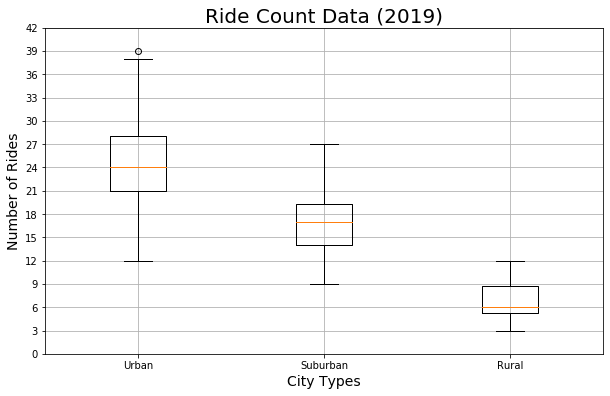

In [17]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()


In [18]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


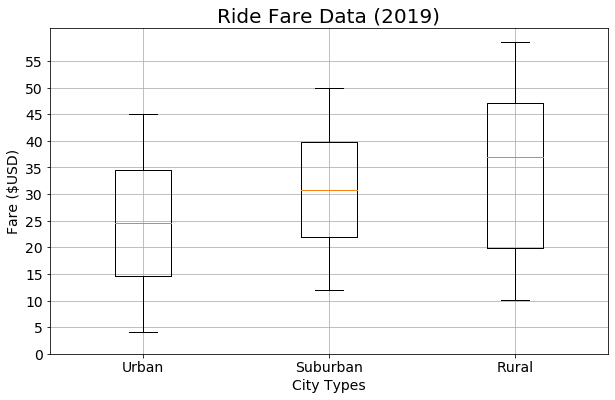

In [28]:
#create box and wisker plots for urban fare data. 

x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fix, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)

# add words and chart features
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()


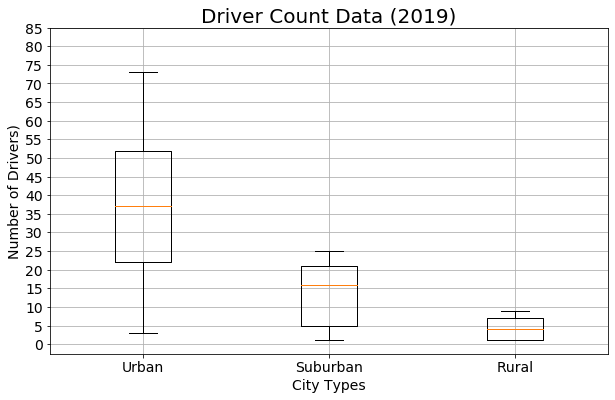

Summary Statistics Urban Driver Count


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [29]:
# Create the box-and-whisker plot for the driver count data.

x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")

plt.show()

print("Summary Statistics Urban Driver Count")
urban_drivers.describe()

In [21]:
# Get the sum of the fares for each city type and sum. 

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares = sum_fares_by_type.sum()

# Calculate the percentage of fare for each city type.
type_percents = sum_fares_by_type/total_fares * 100
type_percents.values

array([ 6.81149297, 30.46387206, 62.72463496])

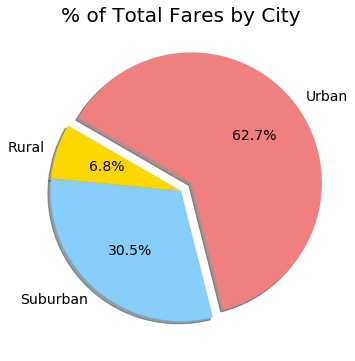

In [26]:
# Pie chart for fares by city type. 

plt.figure(figsize=(10,6))
explode = [0, 0, 0.1]
colors=["gold", "lightskyblue", "lightcoral"]


plt.pie(type_percents, explode=explode, colors=colors, labels=type_percents.index, autopct='%1.1f%%', shadow=True, startangle=150)


plt.title("% of Total Fares by City", fontsize=20)

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

plt.show()

In [44]:
# get total rides by city type, and percentage

sum_rides_by_type= pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides = sum_rides_by_type.sum()

ride_percents = sum_rides_by_type/total_rides*100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

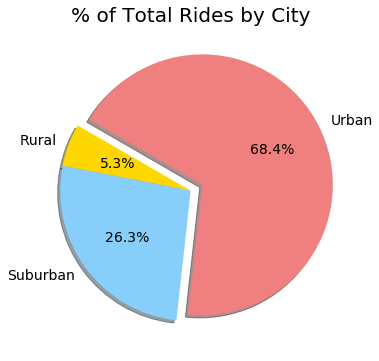

In [46]:
# Pie chart for fares by city type. 

plt.figure(figsize=(10,6))
explode = [0, 0, 0.1]
colors=["gold", "lightskyblue", "lightcoral"]


plt.pie(ride_percents, explode=explode, colors=colors, labels=ride_percents.index, autopct='%1.1f%%', shadow=True, startangle=150)


plt.title("% of Total Rides by City", fontsize=20)

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

plt.show()

In [50]:
#get avgerage number of drivers per city types and percentages

sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers = sum_drivers_by_type.sum()

# Calculate the percentage of fare for each city type.
driver_percents = sum_drivers_by_type/total_drivers * 100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

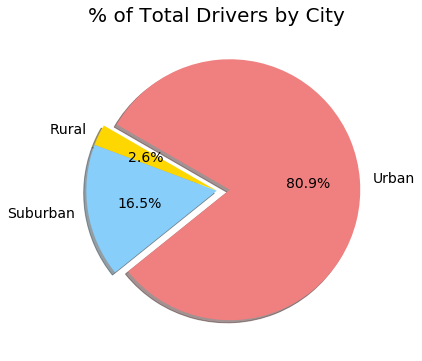

In [52]:
# Pie chart for fares by city type. 

plt.figure(figsize=(10,6))
explode = [0, 0, 0.1]
colors=["gold", "lightskyblue", "lightcoral"]


plt.pie(driver_percents, explode=explode, colors=colors, labels=driver_percents.index, autopct='%1.1f%%', shadow=True, startangle=150)


plt.title("% of Total Drivers by City", fontsize=20)

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

plt.show()